In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Record counts and database names
throughputs = [1000, 3000, 5000]
databases = ["redis", "memcached"]
workload = "f"
input_dir = "./throughput_runs"  # Directory containing result files
output_dir = "./plots"

# Initialize dictionaries to store results
read_latency_data = {db: [] for db in databases}
update_latency_data = {db: [] for db in databases}
read_modify_write_latency_data = {db: [] for db in databases}
throughput_data = {db: [] for db in databases}

In [4]:
# Parse files and collect data
for db in databases:
    read_latency_data[db] = []
    update_latency_data[db] = []
    read_modify_write_latency_data[db] = []
    throughput_data[db] = []
    for throughput in throughputs:
        file_name = f"{db}_workload{workload}_tr_{throughput}.txt"
        file_path = os.path.join(input_dir, file_name)
        with open(file_path, "r") as file:
            content = file.read()
            # Extract metrics using regex
            read_latency_match = re.search(r"\[READ\], AverageLatency\(us\), ([0-9.]+)", content)
            update_latency_match = re.search(r"\[UPDATE\], AverageLatency\(us\), ([0-9.]+)", content)
            read_modify_write_latency_match = re.search(r"\[READ-MODIFY-WRITE\], AverageLatency\(us\), ([0-9.]+)", content)
            throughput_match = re.search(r"\[OVERALL\], Throughput\(ops/sec\), ([0-9.]+)", content)

            # Store extracted values with default handling for missing matches
            read_latency = float(read_latency_match.group(1)) if read_latency_match else 0.0
            update_latency = float(update_latency_match.group(1)) if update_latency_match else 0.0
            read_modify_write_latency = float(read_modify_write_latency_match.group(1)) if read_modify_write_latency_match else 0.0
            throughput_val = float(throughput_match.group(1)) if throughput_match else 0.0
            
            # Append to respective lists
            read_latency_data[db].append(read_latency)
            update_latency_data[db].append(update_latency)
            read_modify_write_latency_data[db].append(read_modify_write_latency)
            throughput_data[db].append(throughput_val)

In [19]:
def plot_metric(data, metric, file_name):
    for db, latencies in data.items():
        plt.plot(throughputs, latencies, label=db, marker='o', markersize=8, linewidth=1.5)

    plt_title = f"Workload {workload} - {metric} vs Throughput"
    plt.xlabel("Throughput (ops/sec)")
    plt.ylabel("Average Latency (ms)")
    plt.title(plt_title)
    # plt.xscale("log")  # Log scale for record counts
    plt.legend()

    # Save or display the plot
    plt_file_name = f"{file_name}_vs_thr_workload{workload}.png"
    plt.savefig(os.path.join(output_dir, plt_file_name))
    plt.show()
    plt.close()

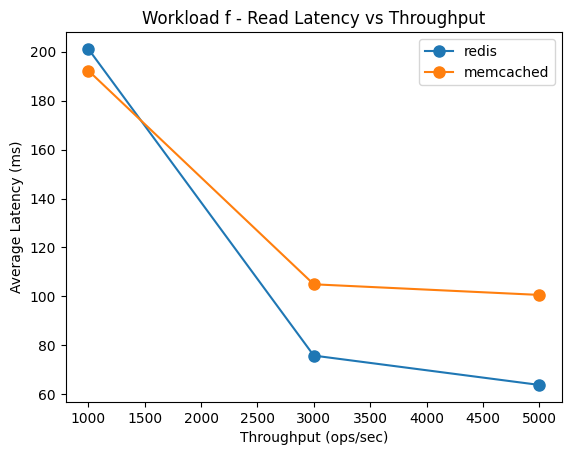

In [20]:
plot_metric(read_latency_data, "Read Latency", "read_latency")

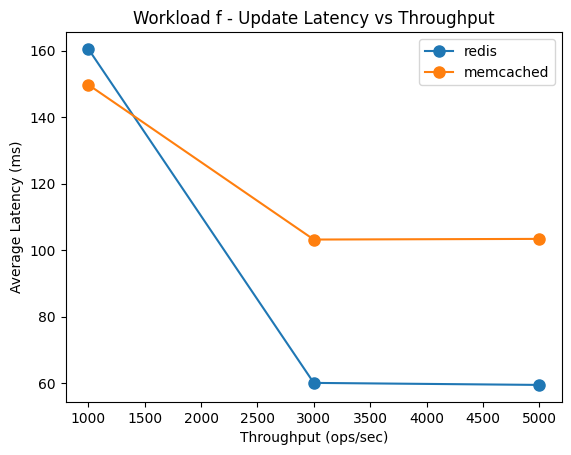

In [21]:
plot_metric(update_latency_data, "Update Latency", "update_latency")

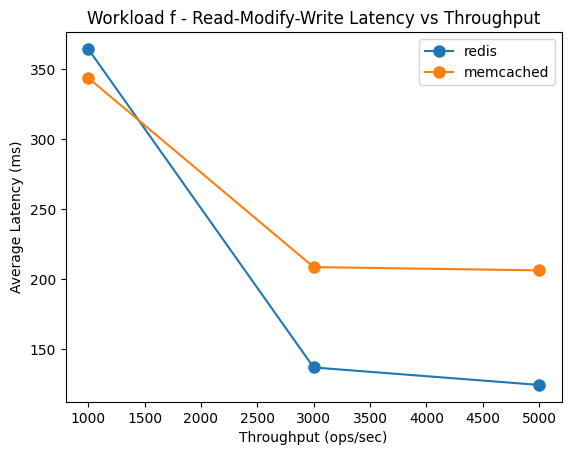

In [22]:
plot_metric(read_modify_write_latency_data, "Read-Modify-Write Latency", "read_modify_write_latency")